# New Section

In [1]:
#Connecting Google Drive or else download the dataset and access through files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [4]:
#Reading data
data = pd.read_csv('D:\House-Price-Prediction-using-Machine-Learning-Algorithm---The-case-of-Hyderabad-India\Zip\Dataset\Hyderabad-Data.csv')

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\MohdS\AppData\Local\Temp\ipykernel_12904\2295445005.py:2: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_csv('D:\House-Price-Prediction-using-Machine-Learning-Algorithm---The-case-of-Hyderabad-India\Zip\Dataset\Hyderabad-Data.csv')


In [5]:
 data = data.sample(n=2000,random_state = 1)

In [6]:
data.head()

,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,property_size,reactivationSource,rent_amount,sharedAccomodation,shortUrl,swimmingPool,totalFloor,type_bhk,waterSupply,weight
15005,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",0.0,2,NaN,"Telecom Nagar , near Howard Lake View School",28000,NaN,NaN,2,...,1000,NaN,14000,False,http://nobr.kr/sv/RBy1h,False,3,BHK2,NaN,NaN
11064,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",3.0,3,NaN,Huda Park Rd near More Supermarket,90000,NE,North-East,1,...,1800,MISSED_CALL,30000,False,http://nobr.kr/sv/6T5b4,False,4,BHK3,NaN,NaN
6423,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",NaN,2,NaN,"Hanuman Nagar, Near KIMS Plastic Surgery",46000,NaN,NaN,2,...,1250,PROPERTY_DASHBOARD,23000,False,http://nobr.kr/sv/DVd44,False,5,BHK2,BOREWELL,NaN
4845,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3.0,2,NaN,"Kvr Towers, Friends Colony, Indira Nagar Colon...",44000,E,East,2,...,1700,USER_DASHBOARD,22000,False,http://nobr.kr/sv/tMQfj,False,5,BHK3,CORP_BORE,NaN
1288,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1.0,1,NaN,"Padmarao Nagar, near Shivalayam Temple",10000,E,East,1,...,500,NaN,5300,False,http://nobr.kr/sv/pbkDh,False,2,BHK1,BOREWELL,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 15801 to 11475
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              2000 non-null   bool   
 1   amenities           1980 non-null   object 
 2   balconies           1037 non-null   float64
 3   bathroom            2000 non-null   int64  
 4   combineDescription  0 non-null      float64
 5   completeStreetName  2000 non-null   object 
 6   deposit             2000 non-null   int64  
 7   facing              1022 non-null   object 
 8   facingDesc          1022 non-null   object 
 9   floor               2000 non-null   int64  
 10  furnishingDesc      2000 non-null   object 
 11  gym                 2000 non-null   bool   
 12  id                  2000 non-null   object 
 13  isMaintenance       2000 non-null   bool   
 14  lift                2000 non-null   bool   
 15  loanAvailable       2000 non-null   bool   
 16  locali

In [8]:
data.describe()

,balconies,bathroom,combineDescription,deposit,floor,maintenanceAmount,property_age,property_size,rent_amount,totalFloor,weight
count,1037.000000,2000.000000,0.0,2.000000e+03,2000.000000,997.000000,2000.000000,2000.000000,2000.000000,2000.000000,0.0
mean,1.448409,1.913500,NaN,3.286520e+04,2.110000,1684.144433,3.731000,1058.107000,14754.499000,3.913000,NaN
std,0.811649,0.765709,NaN,5.231889e+04,2.347905,1746.353865,3.409612,532.732772,9206.112829,3.704766,NaN
min,0.000000,1.000000,NaN,1.000000e+00,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,NaN,1.600000e+04,1.000000,800.000000,1.000000,671.250000,8500.000000,2.000000,NaN
50%,1.000000,2.000000,NaN,2.400000e+04,2.000000,1500.000000,3.000000,1000.000000,12000.000000,3.000000,NaN
75%,2.000000,2.000000,NaN,4.000000e+04,3.000000,2000.000000,5.000000,1350.000000,18000.000000,5.000000,NaN
max,6.000000,8.000000,NaN,2.000000e+06,24.000000,32000.000000,10.000000,4000.000000,95000.000000,33.000000,NaN


In [7]:
#Dropping Irrelevant columns
New_Data = data.drop(['active', 'amenities', 'balconies',
       'completeStreetName', 'facing', 'facingDesc',
        'id', 'isMaintenance', 'lift', 'loanAvailable',
         'ownerName','waterSupply',
       'reactivationSource',
        'shortUrl', 'swimmingPool',
        'weight','combineDescription','deposit','furnishingDesc','gym','parking','parkingDesc',
                      'location','localityId','propertyTitle','propertyType','sharedAccomodation']
,axis=1)

In [8]:
# after removing irrelevant columns
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 15005 to 5659
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathroom           2000 non-null   int64  
 1   floor              2000 non-null   int64  
 2   locality           2000 non-null   object 
 3   maintenanceAmount  997 non-null    float64
 4   property_age       2000 non-null   int64  
 5   property_size      2000 non-null   int64  
 6   rent_amount        2000 non-null   int64  
 7   totalFloor         2000 non-null   int64  
 8   type_bhk           2000 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 156.2+ KB


In [10]:
New_Data.replace({'type_bhk':{'RK1':0.5,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5}},inplace=True)

In [11]:
# Replace 'None' with 0 in the 'maintenanceAmount' and 'rent_amount' columns
New_Data['maintenanceAmount'].replace('None', 0, inplace=True)
New_Data['rent_amount'].replace('None', 0, inplace=True)

# Convert the 'maintenanceAmount' and 'rent_amount' columns to numeric data
New_Data['maintenanceAmount'] = pd.to_numeric(New_Data['maintenanceAmount'])
New_Data['rent_amount'] = pd.to_numeric(New_Data['rent_amount'])

C:\Users\MohdS\AppData\Local\Temp\ipykernel_12904\3057803198.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  New_Data['maintenanceAmount'].replace('None', 0, inplace=True)
C:\Users\MohdS\AppData\Local\Temp\ipykernel_12904\3057803198.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [12]:
# Assuming 'object_column' contains strings and 'int_column' contains integ
New_Data['total_price'] = New_Data['maintenanceAmount'].astype(str) + New_Data['rent_amount'].astype(str)

In [13]:
New_Data['total_price']

15005       nan14000
11064       1.030000
6423     1800.023000
4845     2000.022000
1288         nan5300
            ...     
17219       nan14000
16475       nan23000
14206    1500.024000
8733      1000.07000
5659     1000.010000
Name: total_price, Length: 2000, dtype: object

In [14]:
#Concatenating
New_Data = pd.concat([New_Data.iloc[:, :-1], New_Data['total_price']], axis=1)

In [15]:
New_Data.head()

,bathroom,floor,locality,maintenanceAmount,property_age,property_size,rent_amount,totalFloor,type_bhk,total_price
15005,2,2,Gachibowli,NaN,5,1000,14000,3,2.0,nan14000
11064,3,1,Sanjeeva Reddy Nagar,1.0,7,1800,30000,4,3.0,1.030000
6423,2,2,Kondapur,1800.0,0,1250,23000,5,2.0,1800.023000
4845,2,2,Miyapur,2000.0,10,1700,22000,5,3.0,2000.022000
1288,1,1,Parsigutta,NaN,3,500,5300,2,1.0,nan5300


In [16]:
New_Data = New_Data.drop(['rent_amount', 'maintenanceAmount'],axis=1)

In [19]:
New_Data.head()

,bathroom,floor,locality,property_age,property_size,totalFloor,type_bhk,total_price
15005,2,2,Gachibowli,5,1000,3,2.0,nan14000
11064,3,1,Sanjeeva Reddy Nagar,7,1800,4,3.0,1.030000
6423,2,2,Kondapur,0,1250,5,2.0,1800.023000
4845,2,2,Miyapur,10,1700,5,3.0,2000.022000
1288,1,1,Parsigutta,3,500,2,1.0,nan5300


In [17]:
# after removing irrelevant columns
New_Data.isnull().sum()

bathroom         0
floor            0
locality         0
property_age     0
property_size    0
totalFloor       0
type_bhk         0
total_price      0
dtype: int64

In [18]:
New_Data.isnull().sum()

bathroom         0
floor            0
locality         0
property_age     0
property_size    0
totalFloor       0
type_bhk         0
total_price      0
dtype: int64

In [19]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 15005 to 5659
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathroom       2000 non-null   int64  
 1   floor          2000 non-null   int64  
 2   locality       2000 non-null   object 
 3   property_age   2000 non-null   int64  
 4   property_size  2000 non-null   int64  
 5   totalFloor     2000 non-null   int64  
 6   type_bhk       2000 non-null   float64
 7   total_price    2000 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 140.6+ KB


In [20]:
New_Data.head()

,bathroom,floor,locality,property_age,property_size,totalFloor,type_bhk,total_price
15005,2,2,Gachibowli,5,1000,3,2.0,nan14000
11064,3,1,Sanjeeva Reddy Nagar,7,1800,4,3.0,1.030000
6423,2,2,Kondapur,0,1250,5,2.0,1800.023000
4845,2,2,Miyapur,10,1700,5,3.0,2000.022000
1288,1,1,Parsigutta,3,500,2,1.0,nan5300


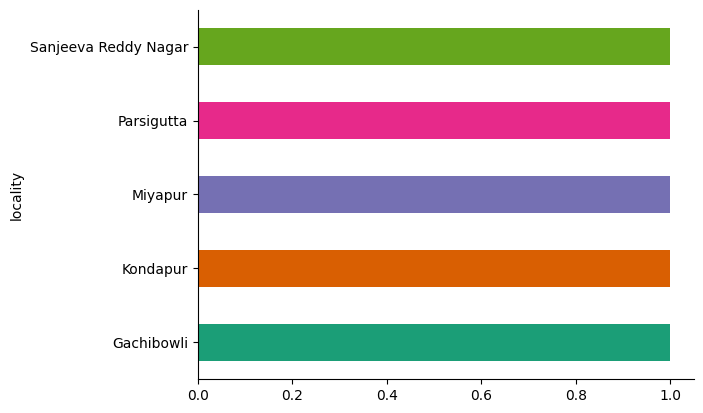

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('locality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

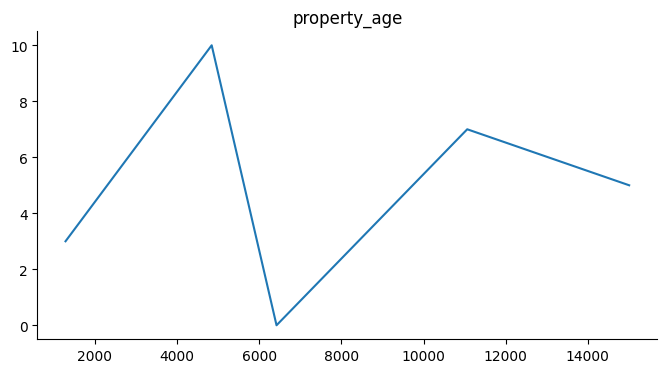

In [25]:
from matplotlib import pyplot as plt
_df_12['property_age'].plot(kind='line', figsize=(8, 4), title='property_age')
plt.gca().spines[['top', 'right']].set_visible(False)

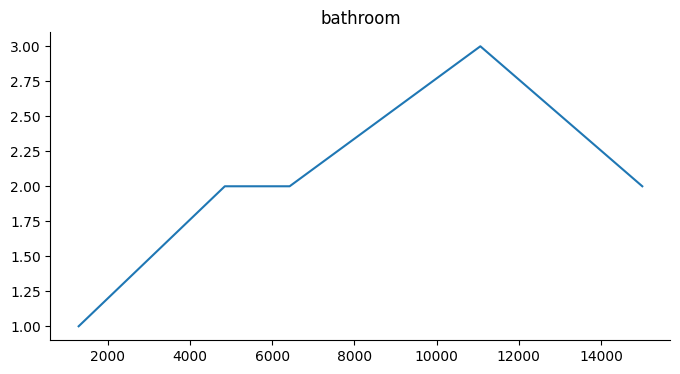

In [26]:
from matplotlib import pyplot as plt
_df_10['bathroom'].plot(kind='line', figsize=(8, 4), title='bathroom')
plt.gca().spines[['top', 'right']].set_visible(False)

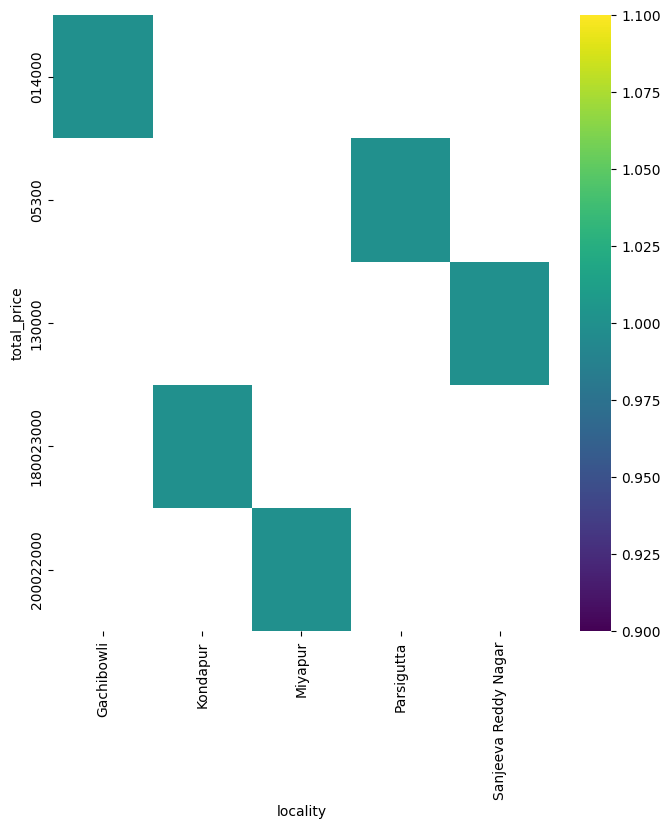

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['total_price'].value_counts()
    for x_label, grp in _df_14.groupby('locality')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('locality')
_ = plt.ylabel('total_price')

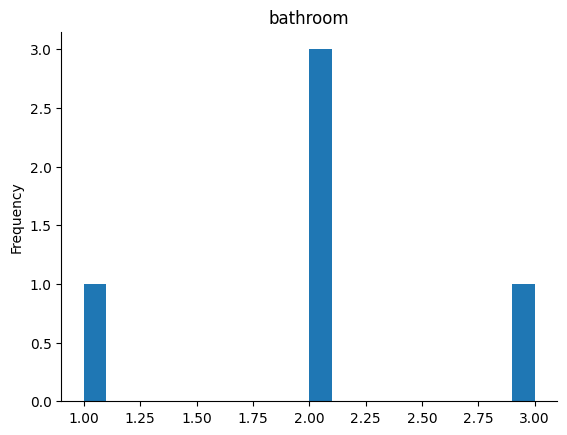

In [29]:
from matplotlib import pyplot as plt
_df_0['bathroom'].plot(kind='hist', bins=20, title='bathroom')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
New_Data.head()

,bathroom,floor,locality,property_age,property_size,totalFloor,type_bhk,total_price
15005,2,2,Gachibowli,5,1000,3,2.0,014000
11064,3,1,Sanjeeva Reddy Nagar,7,1800,4,3.0,130000
6423,2,2,Kondapur,0,1250,5,2.0,180023000
4845,2,2,Miyapur,10,1700,5,3.0,200022000
1288,1,1,Parsigutta,3,500,2,1.0,05300


OUTLIERS ANALYSIS


In [21]:
#Function() to detect Outliers
def detect_outliers_z_score(New_Data):
    threshold = 3
    mean = New_Data.mean()
    std = New_Data.std()
    z_scores = (New_Data - mean) / std
    return (z_scores > threshold) | (z_scores < -threshold)

In [12]:
# Outliers in property_size
outliers= detect_outliers_z_score(New_Data['property_size'])
if not outliers.empty:
    print("Outliers in the column:")
    print(outliers)


Outliers in the column:
15005    False
11064    False
6423     False
4845     False
1288     False
         ...  
17219    False
16475    False
14206    False
8733     False
5659     False
Name: property_size, Length: 2000, dtype: bool


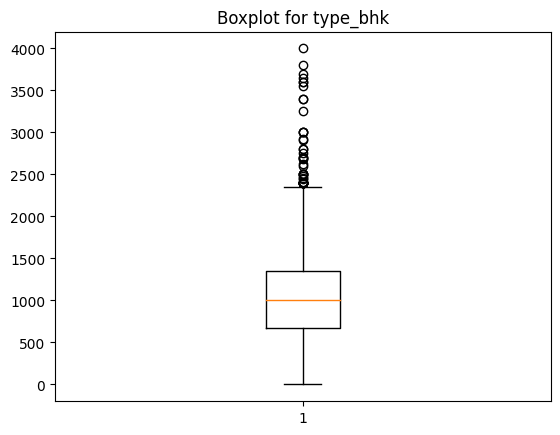

In [33]:
plt.figure()
plt.boxplot(New_Data['property_size'])
plt.title('Boxplot for type_bhk')
plt.show()

In [13]:
Data = New_Data[~New_Data['property_size'].isin(outliers)]

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(Data)

DataFrame after removing outliers:
       bathroom  floor              locality  property_age  property_size  \
15005         2      2            Gachibowli             5           1000   
11064         3      1  Sanjeeva Reddy Nagar             7           1800   
6423          2      2              Kondapur             0           1250   
4845          2      2               Miyapur            10           1700   
1288          1      1            Parsigutta             3            500   
...         ...    ...                   ...           ...            ...   
17219         1      2          Himayatnagar             0            300   
16475         3      0     Ramachandra Puram             5           2000   
14206         3      5            Kukatpally             0           1500   
8733          2      3      Serilingampalle              5            800   
5659          2      0             Manikonda             3            800   

       totalFloor  type_bhk  total_price

In [14]:
# Outliers in property_age
outliers= detect_outliers_z_score(New_Data['property_age'])
if not outliers.empty:
    print("Outliers in the column:")
    print(outliers)


Outliers in the column:
15005    False
11064    False
6423     False
4845     False
1288     False
         ...  
17219    False
16475    False
14206    False
8733     False
5659     False
Name: property_age, Length: 2000, dtype: bool


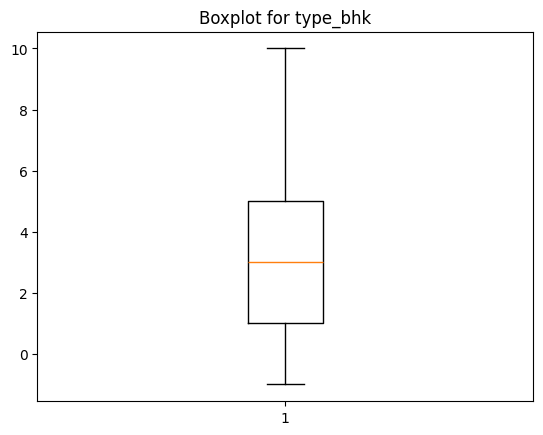

In [61]:
plt.figure()
plt.boxplot(New_Data['property_age'])
plt.title('Boxplot for type_bhk')
plt.show()

In [15]:
Data = New_Data[~New_Data['property_age'].isin(outliers)]

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(Data)

DataFrame after removing outliers:
       bathroom  floor              locality  property_age  property_size  \
15005         2      2            Gachibowli             5           1000   
11064         3      1  Sanjeeva Reddy Nagar             7           1800   
4845          2      2               Miyapur            10           1700   
1288          1      1            Parsigutta             3            500   
1638          3      0               Miyapur             3           1350   
...         ...    ...                   ...           ...            ...   
13642         2      4                 Abids             5           1250   
9310          2      5     Vivekananda Nagar             3           1200   
16475         3      0     Ramachandra Puram             5           2000   
8733          2      3      Serilingampalle              5            800   
5659          2      0             Manikonda             3            800   

       totalFloor  type_bhk  total_price

In [16]:
# Outliers in totalFloor
outliers= detect_outliers_z_score(New_Data['totalFloor'])
if not outliers.empty:
    print("Outliers in the column:")
    print(outliers)

Outliers in the column:
15005    False
11064    False
6423     False
4845     False
1288     False
         ...  
17219    False
16475    False
14206    False
8733     False
5659     False
Name: totalFloor, Length: 2000, dtype: bool


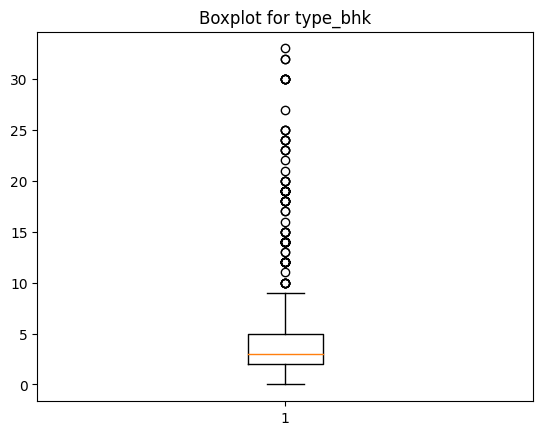

In [39]:
plt.figure()
plt.boxplot(New_Data['totalFloor'])
plt.title('Boxplot for type_bhk')
plt.show()

In [17]:
Data = New_Data[~New_Data['totalFloor'].isin(outliers)]

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(Data)

DataFrame after removing outliers:
       bathroom  floor              locality  property_age  property_size  \
15005         2      2            Gachibowli             5           1000   
11064         3      1  Sanjeeva Reddy Nagar             7           1800   
6423          2      2              Kondapur             0           1250   
4845          2      2               Miyapur            10           1700   
1288          1      1            Parsigutta             3            500   
...         ...    ...                   ...           ...            ...   
17219         1      2          Himayatnagar             0            300   
16475         3      0     Ramachandra Puram             5           2000   
14206         3      5            Kukatpally             0           1500   
8733          2      3      Serilingampalle              5            800   
5659          2      0             Manikonda             3            800   

       totalFloor  type_bhk  total_price

In [18]:
# Outliers in type_bhk
outliers= detect_outliers_z_score(New_Data['type_bhk'])
if not outliers.empty:
    print("Outliers in the column:")
    print(outliers)

Outliers in the column:
15005    False
11064    False
6423     False
4845     False
1288     False
         ...  
17219    False
16475    False
14206    False
8733     False
5659     False
Name: type_bhk, Length: 2000, dtype: bool


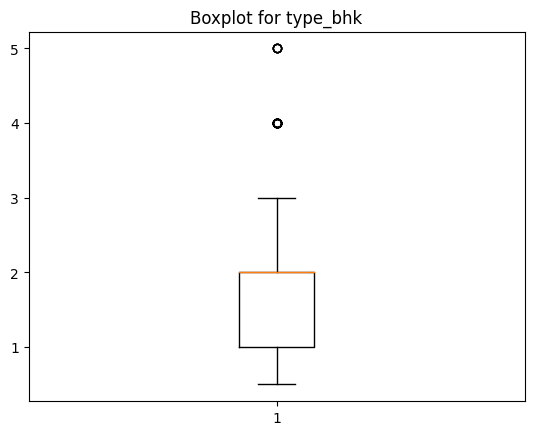

In [42]:
plt.figure()
plt.boxplot(New_Data['type_bhk'])
plt.title('Boxplot for type_bhk')
plt.show()

In [19]:
Data = New_Data[~New_Data['type_bhk'].isin(outliers)]

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(Data)

DataFrame after removing outliers:
       bathroom  floor              locality  property_age  property_size  \
15005         2      2            Gachibowli             5           1000   
11064         3      1  Sanjeeva Reddy Nagar             7           1800   
6423          2      2              Kondapur             0           1250   
4845          2      2               Miyapur            10           1700   
10454         2      2         Banjara Hills             0            900   
...         ...    ...                   ...           ...            ...   
9310          2      5     Vivekananda Nagar             3           1200   
17219         1      2          Himayatnagar             0            300   
16475         3      0     Ramachandra Puram             5           2000   
14206         3      5            Kukatpally             0           1500   
8733          2      3      Serilingampalle              5            800   

       totalFloor  type_bhk  total_price

In [20]:
# Outliers in bathroom
outliers= detect_outliers_z_score(New_Data['bathroom'])
if not outliers.empty:
    print("Outliers in the column:")
    print(outliers)

Outliers in the column:
15005    False
11064    False
6423     False
4845     False
1288     False
         ...  
17219    False
16475    False
14206    False
8733     False
5659     False
Name: bathroom, Length: 2000, dtype: bool


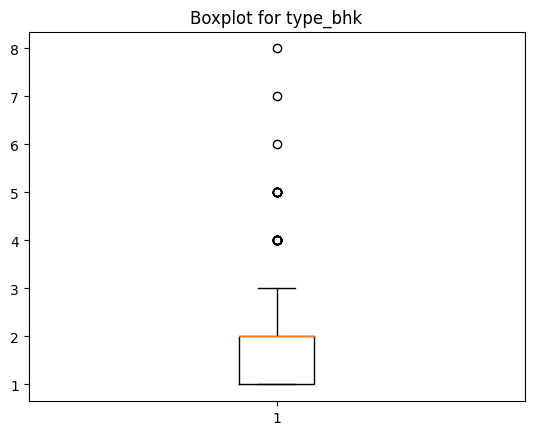

In [45]:
plt.figure()
plt.boxplot(New_Data['bathroom'])
plt.title('Boxplot for type_bhk')
plt.show()

In [21]:
Data = New_Data[~New_Data['bathroom'].isin(outliers)]

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(Data)

DataFrame after removing outliers:
       bathroom  floor              locality  property_age  property_size  \
15005         2      2            Gachibowli             5           1000   
11064         3      1  Sanjeeva Reddy Nagar             7           1800   
6423          2      2              Kondapur             0           1250   
4845          2      2               Miyapur            10           1700   
10454         2      2         Banjara Hills             0            900   
...         ...    ...                   ...           ...            ...   
9310          2      5     Vivekananda Nagar             3           1200   
16475         3      0     Ramachandra Puram             5           2000   
14206         3      5            Kukatpally             0           1500   
8733          2      3      Serilingampalle              5            800   
5659          2      0             Manikonda             3            800   

       totalFloor  type_bhk  total_price

In [22]:
locality_data = New_Data['locality']
print(locality_data)

15005              Gachibowli
11064    Sanjeeva Reddy Nagar
6423                 Kondapur
4845                  Miyapur
1288               Parsigutta
                 ...         
17219            Himayatnagar
16475       Ramachandra Puram
14206              Kukatpally
8733         Serilingampalle 
5659                Manikonda
Name: locality, Length: 2000, dtype: object


In [23]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'locality' column
New_Data['locality_encoded'] = label_encoder.fit_transform(New_Data['locality'])

In [24]:
# Features and target variable
X = New_Data[['bathroom','locality_encoded', 'property_age', 'property_size', 'totalFloor', 'type_bhk']]
y = New_Data['total_price']

In [25]:
# Initialize the model
model = GradientBoostingRegressor()

In [91]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import numpy as np

In [26]:
New_Data.head()

,bathroom,floor,locality,property_age,property_size,totalFloor,type_bhk,total_price,locality_encoded
15005,2,2,Gachibowli,5,1000,3,2.0,nan14000,173
11064,3,1,Sanjeeva Reddy Nagar,7,1800,4,3.0,1.030000,467
6423,2,2,Kondapur,0,1250,5,2.0,1800.023000,274
4845,2,2,Miyapur,10,1700,5,3.0,2000.022000,342
1288,1,1,Parsigutta,3,500,2,1.0,nan5300,387


In [30]:
dess = New_Data.columns[-1]
dess

'locality_encoded'

In [31]:
New_Data['total_price'] = New_Data['total_price'].astype(str)

In [32]:
New_Data['total_price'] = pd.to_numeric(New_Data['total_price'].str.replace(',', ''), errors='coerce')

In [33]:
New_Data = New_Data.dropna(subset=['total_price'])

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
indices_with_nan = y_train[y_train.str.contains('nan7000')].index
indices_with_nan

Index([ 4178, 12119, 18249,  4883,  5742, 15605,  2482, 14162, 18339, 13169,
       11131,  7268, 14689, 13441, 10871,  1481, 14985,  1798, 14911, 13835,
        4575, 13044,  1299, 14100, 11989,  4601,  2552, 10520, 14352,  2748,
        8953, 17283],
      dtype='int64')

In [36]:
# Assuming your data is in a DataFrame called 'df'
print(New_Data.isna().sum())

bathroom            0
floor               0
locality            0
property_age        0
property_size       0
totalFloor          0
type_bhk            0
total_price         0
locality_encoded    0
dtype: int64


In [38]:
# Convert y to numeric, coercing errors to NaN
y = pd.to_numeric(y, errors='coerce')

In [39]:
X_cleaned = X[~y.isna()]
y_cleaned = y.dropna()

In [40]:
# Ensure X_cleaned and y_cleaned are still aligned after dropping NaNs
X_cleaned = X_cleaned.loc[y_cleaned.index]

In [41]:
# Display cleaned y
print("Cleaned y:")
print(y_cleaned)

Cleaned y:
11064       1.030
6423     1800.023
4845     2000.022
1638     1000.070
4960      500.050
           ...   
13642    1500.017
9310     1200.022
14206    1500.024
8733     1000.070
5659     1000.010
Name: total_price, Length: 997, dtype: float64


In [42]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [43]:
# Train the model
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [53]:
New_Data.head()

,bathroom,floor,locality,property_age,property_size,totalFloor,type_bhk,total_price,locality_encoded
15005,2,2,Gachibowli,5,1000,3,2.0,014000,130
11064,3,1,Sanjeeva Reddy Nagar,7,1800,4,3.0,130000,364
6423,2,2,Kondapur,0,1250,5,2.0,180023000,208
4845,2,2,Miyapur,10,1700,5,3.0,200022000,265
10454,2,2,Banjara Hills,0,900,4,2.0,024000,78


In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [1]:
# Define a list of models to train
model = 'Neural Network': MLPRegressor(max_iter=1000)


SyntaxError: invalid syntax (4215387895.py, line 2)

In [53]:
# Train and evaluate models
best_model = None
best_score = float('inf')
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MAE={mae}, MSE={mse}, R2={r2}')
    if mae < best_score:
        best_score = mae
        best_model = model

print(f'Best Model: {best_model}')

Decision Tree: MAE=767.1749035, MSE=1735355.0629555085, R2=-0.14233058194026582
Random Forest: MAE=569.7097028867857, MSE=825910.1210005069, R2=0.45632890392699244
Gradient Boosting: MAE=584.987669464388, MSE=986899.8945717568, R2=0.3503543136798133
XGBoost: MAE=630.1798578752442, MSE=1034992.0748044258, R2=0.31869671841029157
SVR: MAE=825.6371613241811, MSE=1455077.6218290562, R2=0.04216739156460503
Neural Network: MAE=586.7536164675903, MSE=640673.0531427064, R2=0.5782647382930888
Best Model: RandomForestRegressor()


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: continuous is not supported

In [58]:
def gaj_to_sqft(gaj):
    # 1 gaj = 9 square feet
    sqft = gaj * 9
    return sqft

# Example usage:
gaj_area = 10
sqft_area = gaj_to_sqft(gaj_area)
print(f"{gaj_area} gaj is equal to {sqft_area} square feet.")


10 gaj is equal to 90 square feet.


In [54]:

# User input
user_inputs = {}

# user_inputs['floor'] = int(input("Enter the floor number: "))
user_inputs['locality'] = input("Enter the locality: ")
user_inputs['property_age'] = int(input("Enter the property age: "))
user_inputs['property_size'] = int(input("Enter the property size: "))
user_inputs['totalFloor'] = int(input("Enter the total floor: "))
user_inputs['type_bhk'] = float(input("Enter the type BHK: "))
user_inputs['bathroom'] = int(input("Enter the number of bathrooms: "))

# Convert user input to DataFrame
input_df = pd.DataFrame([user_inputs])

# Encode the 'locality' column
input_df['locality_encoded'] = label_encoder.transform(input_df['locality'])

# Make predictions
predicted_prices = model.predict(input_df[['bathroom','locality_encoded', 'property_age', 'property_size', 'totalFloor', 'type_bhk']])

# Display the predicted total price
print(f"The predicted total price is: {predicted_prices[0]}")




In [ ]:
#to check if a desired location exists in dataset change the 'narapally' with desired location name
if 'Narapally' in New_Data['locality'].values:
    print("narapally is present in the 'locality' column.")
else:
    print("narapally is not present in the 'locality' column.")